In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

train_data = pd.read_csv('processed_train_data.csv')

In [3]:
continuous_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
target_column = 'final_result_bin'
id_columns = ['id_student','unregistered','date_unregistration']
continuous_columns = continuous_columns.drop(id_columns)

correlations = {}
for col in continuous_columns:
    if col != 'final_result_bin':
        corr, _ = pointbiserialr(train_data['final_result_bin'], train_data[col])
        correlations[col] = corr

# Output correlation coefficient
print("Point-Biserial Correlation with final_result_bin:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr}")

Point-Biserial Correlation with final_result_bin:
gender: -0.016821859631689785
highest_education: -0.07278933618959678
age_band: -0.03705779987621613
num_of_prev_attempts: 0.0326875846980304
studied_credits: 0.19591849582400314
disability: 0.06119708034329473
date_registration: -0.11432040933118802
module_presentation_length: -0.004073898837173775
imd_band_numeric: -0.0637586100321698
year: 0.0670208823243653
registration_lead_ratio: -0.11556225620780697
mean_score: -0.5318816670759215
max_score: -0.5427371455662893
min_score: -0.4948709698969516
n_submissions: -0.43060370045451446
n_missed: 0.03514382226362264
total_clicks: -0.2515897631035993
active_days: -0.3640452227360291
activity_types: -0.39657635681759007
dataplus: -0.021536240353500612
dualpane: -0.09902816086728322
externalquiz: -0.05171962088612694
forumng: -0.17260624704398106
glossary: -0.039203352421113655
homepage: -0.23459643067137873
htmlactivity: -0.02636303164110892
oucollaborate: -0.10535879926252083
oucontent: -0.

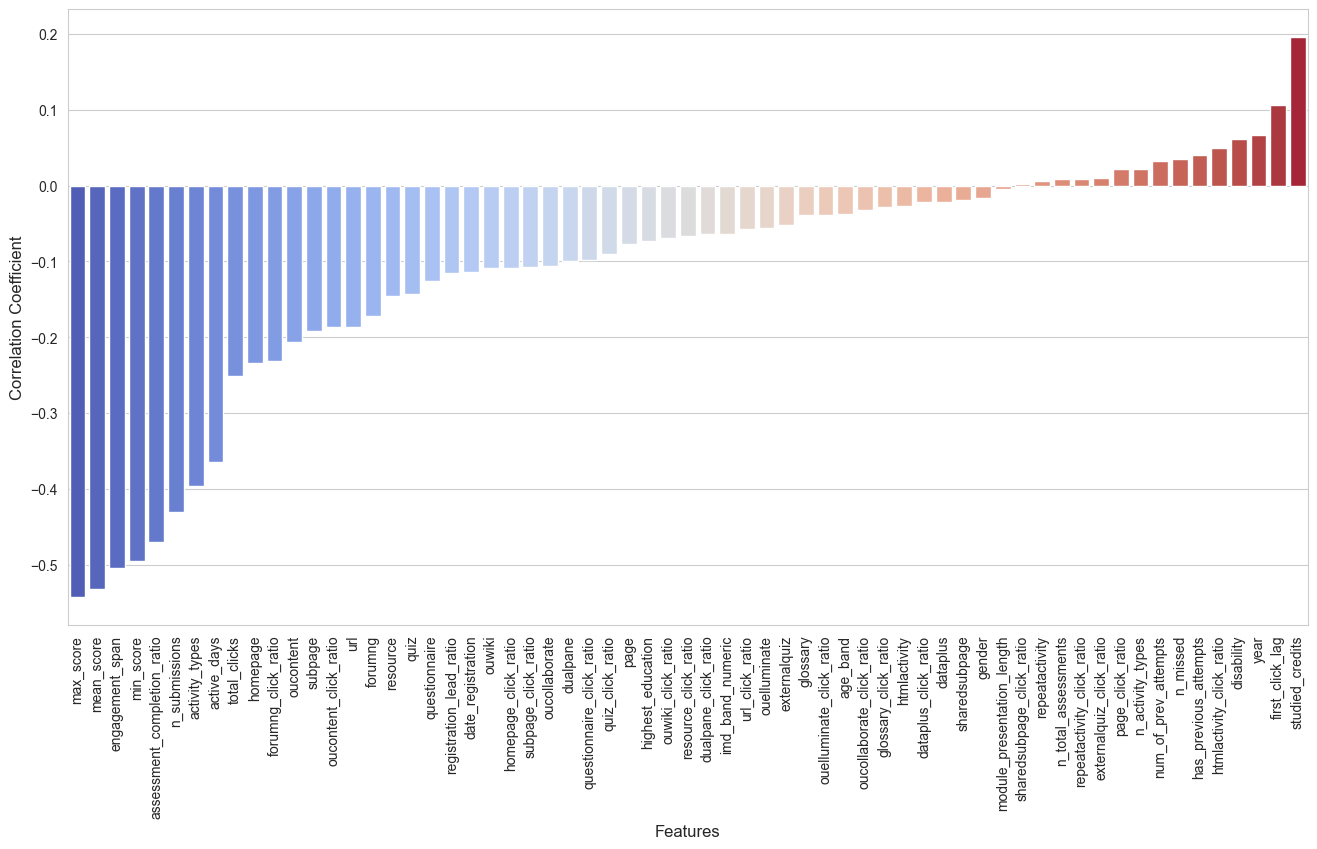

In [11]:
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(16, 8))
sns.barplot(x='Feature', y='Correlation', data=correlation_df, palette='coolwarm')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('correlation_with_final_result.png', dpi=600)
plt.show()